In [111]:
# 필요 라이브러리 로드
from matplotlib import font_manager, rc
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import platform
# 정규식
import re

In [112]:
day_df = pd.read_csv('usage_by_weather.csv')
day_df

,Unnamed: 0.1,Unnamed: 0,year,month,day,temp,cloud,rainfall_total,Humidity_mean,solar,customer,demand_max(Wh),usage(kWh)
0,0,0,2021,1,1,-0.6,7.3,0.0,83.1,9.00,783260,"49,968,118.15","11,154,070.87"
1,1,1,2021,1,2,-0.3,3.8,0.5,67.8,12.54,783281,"43,576,388.06","10,820,313.94"
2,2,2,2021,1,3,-0.6,7.3,0.0,54.6,10.37,783288,"44,345,831.21","10,577,876.27"
3,3,3,2021,1,4,1.2,3.1,0.0,71.8,10.07,783288,"49,666,971.53","11,410,542.58"
4,4,4,2021,1,5,-0.2,8.0,0.0,64.9,7.74,783310,"44,114,435.78","11,097,614.74"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,725,725,2022,12,27,0.3,1.8,0.0,74.1,13.08,800308,"31,743,683.54","9,442,942.40"
726,726,726,2022,12,28,-0.2,5.3,0.0,75.4,9.62,802036,"32,641,190.23","9,679,363.18"
727,727,727,2022,12,29,0.7,2.1,0.0,63.3,12.25,803784,"58,820,056.15","11,754,265.48"
728,728,728,2022,12,30,1.0,6.3,0.0,70.4,9.25,805066,"52,733,978.57","12,149,583.10"


In [113]:
day_df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'], inplace=True)
day_df

,year,month,day,temp,cloud,rainfall_total,Humidity_mean,solar,customer,demand_max(Wh),usage(kWh)
0,2021,1,1,-0.6,7.3,0.0,83.1,9.00,783260,"49,968,118.15","11,154,070.87"
1,2021,1,2,-0.3,3.8,0.5,67.8,12.54,783281,"43,576,388.06","10,820,313.94"
2,2021,1,3,-0.6,7.3,0.0,54.6,10.37,783288,"44,345,831.21","10,577,876.27"
3,2021,1,4,1.2,3.1,0.0,71.8,10.07,783288,"49,666,971.53","11,410,542.58"
4,2021,1,5,-0.2,8.0,0.0,64.9,7.74,783310,"44,114,435.78","11,097,614.74"
...,...,...,...,...,...,...,...,...,...,...,...
725,2022,12,27,0.3,1.8,0.0,74.1,13.08,800308,"31,743,683.54","9,442,942.40"
726,2022,12,28,-0.2,5.3,0.0,75.4,9.62,802036,"32,641,190.23","9,679,363.18"
727,2022,12,29,0.7,2.1,0.0,63.3,12.25,803784,"58,820,056.15","11,754,265.48"
728,2022,12,30,1.0,6.3,0.0,70.4,9.25,805066,"52,733,978.57","12,149,583.10"


In [114]:
day_df1 = day_df.drop(columns=['demand_max(Wh)'])
day_df1

,year,month,day,temp,cloud,rainfall_total,Humidity_mean,solar,customer,usage(kWh)
0,2021,1,1,-0.6,7.3,0.0,83.1,9.00,783260,"11,154,070.87"
1,2021,1,2,-0.3,3.8,0.5,67.8,12.54,783281,"10,820,313.94"
2,2021,1,3,-0.6,7.3,0.0,54.6,10.37,783288,"10,577,876.27"
3,2021,1,4,1.2,3.1,0.0,71.8,10.07,783288,"11,410,542.58"
4,2021,1,5,-0.2,8.0,0.0,64.9,7.74,783310,"11,097,614.74"
...,...,...,...,...,...,...,...,...,...,...
725,2022,12,27,0.3,1.8,0.0,74.1,13.08,800308,"9,442,942.40"
726,2022,12,28,-0.2,5.3,0.0,75.4,9.62,802036,"9,679,363.18"
727,2022,12,29,0.7,2.1,0.0,63.3,12.25,803784,"11,754,265.48"
728,2022,12,30,1.0,6.3,0.0,70.4,9.25,805066,"12,149,583.10"


In [115]:
day_df.info()
day_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            730 non-null    int64  
 1   month           730 non-null    int64  
 2   day             730 non-null    int64  
 3   temp            730 non-null    float64
 4   cloud           730 non-null    float64
 5   rainfall_total  730 non-null    float64
 6   Humidity_mean   730 non-null    float64
 7   solar           730 non-null    float64
 8   customer        730 non-null    int64  
 9   demand_max(Wh)  730 non-null    object 
 10  usage(kWh)      730 non-null    object 
dtypes: float64(5), int64(4), object(2)
memory usage: 62.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            730 non-null    int64  
 1   mo

In [116]:
day_df['demand_max(Wh)'] = day_df['demand_max(Wh)'].apply(
    lambda x: float(re.findall('\d+',x.replace(',','').replace('.', ''))[0]) /100 if pd.notnull(x) else x)

In [117]:
day_df['usage(kWh)'] = day_df['usage(kWh)'].apply(
    lambda x: float(re.findall('\d+',x.replace(',','').replace('.', ''))[0]) /100 if pd.notnull(x) else x)

In [118]:
day_df1['usage(kWh)'] = day_df1['usage(kWh)'].apply(
    lambda x: float(re.findall('\d+',x.replace(',','').replace('.', ''))[0]) /100 if pd.notnull(x) else x)

In [119]:
day_df.info()
day_df['usage(kWh)']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            730 non-null    int64  
 1   month           730 non-null    int64  
 2   day             730 non-null    int64  
 3   temp            730 non-null    float64
 4   cloud           730 non-null    float64
 5   rainfall_total  730 non-null    float64
 6   Humidity_mean   730 non-null    float64
 7   solar           730 non-null    float64
 8   customer        730 non-null    int64  
 9   demand_max(Wh)  730 non-null    float64
 10  usage(kWh)      730 non-null    float64
dtypes: float64(7), int64(4)
memory usage: 62.9 KB


0      11154070.87
1      10820313.94
2      10577876.27
3      11410542.58
4      11097614.74
          ...     
725     9442942.40
726     9679363.18
727    11754265.48
728    12149583.10
729    11472992.97
Name: usage(kWh), Length: 730, dtype: float64

In [120]:
day_df.isnull().sum()

year              0
month             0
day               0
temp              0
cloud             0
rainfall_total    0
Humidity_mean     0
solar             0
customer          0
demand_max(Wh)    0
usage(kWh)        0
dtype: int64

In [121]:
day_df.rename(columns={'demand_max(Wh)' : 'wh', 'usage(kWh)' : 'kwh'}, inplace=True)

In [122]:
day_df1.rename(columns={'usage(kWh)' : 'kwh'}, inplace=True)

In [123]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            730 non-null    int64  
 1   month           730 non-null    int64  
 2   day             730 non-null    int64  
 3   temp            730 non-null    float64
 4   cloud           730 non-null    float64
 5   rainfall_total  730 non-null    float64
 6   Humidity_mean   730 non-null    float64
 7   solar           730 non-null    float64
 8   customer        730 non-null    int64  
 9   wh              730 non-null    float64
 10  kwh             730 non-null    float64
dtypes: float64(7), int64(4)
memory usage: 62.9 KB


In [128]:
day_df.to_csv('usage_by_weather2.csv')

In [124]:
col_day_df = day_df.columns
col_day_df

Index(['year', 'month', 'day', 'temp', 'cloud', 'rainfall_total',
       'Humidity_mean', 'solar', 'customer', 'wh', 'kwh'],
      dtype='object')

Text(0.5, 1.0, '날씨와 전력 상관관계')

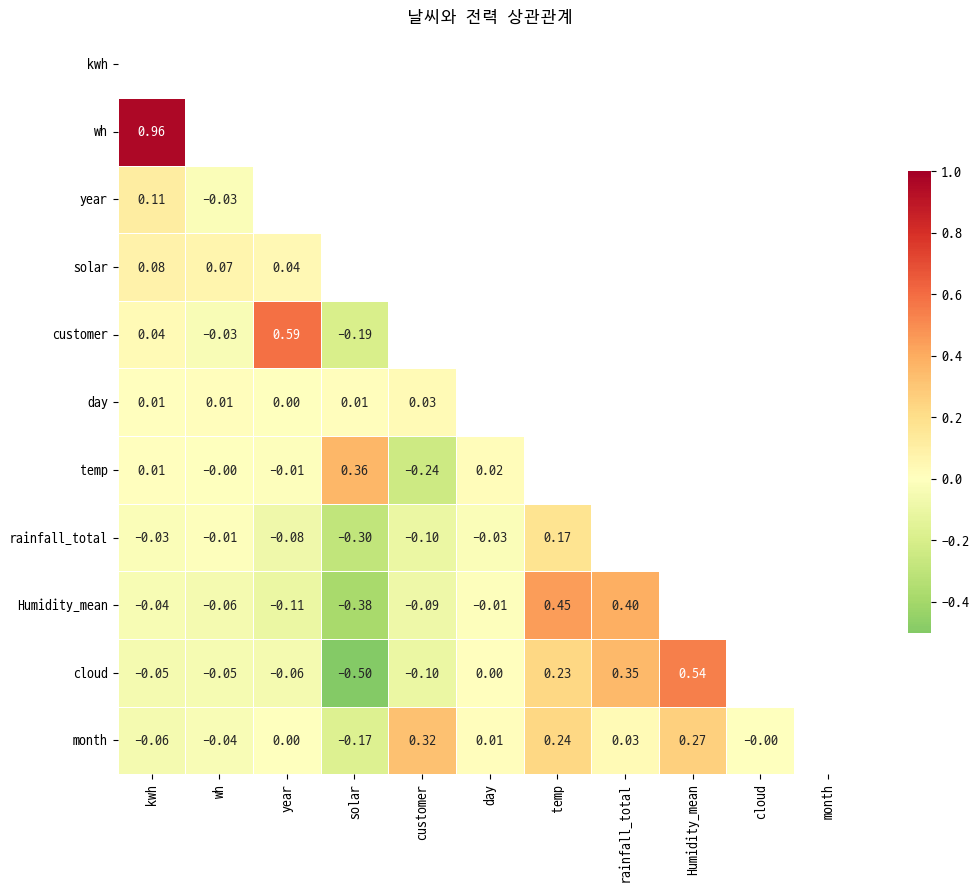

In [125]:

kw_matrix = day_df.corr()
kw_matrix = kw_matrix.sort_values(by = 'kwh', axis = 0, ascending=False)
kw_matrix = kw_matrix[kw_matrix.index]
kw_matrix
# 상관관계의 시각적 표현
f, ax = plt.subplots(figsize=(12, 12))
corr = kw_matrix.select_dtypes(exclude=["object","bool"]).corr()

# 대각 행렬을 기준으로 한 쪽만 나타나게 설정해줍니다.
mask = np.zeros_like(kw_matrix, dtype='bool')
mask[np.triu_indices_from(mask)] = True

g = sns.heatmap(kw_matrix, cmap='RdYlGn_r', vmax= 1, mask=mask, 
center=0, annot=True, fmt='.2f', square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("날씨와 전력 상관관계")

In [126]:
day_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            730 non-null    int64  
 1   month           730 non-null    int64  
 2   day             730 non-null    int64  
 3   temp            730 non-null    float64
 4   cloud           730 non-null    float64
 5   rainfall_total  730 non-null    float64
 6   Humidity_mean   730 non-null    float64
 7   solar           730 non-null    float64
 8   customer        730 non-null    int64  
 9   kwh             730 non-null    float64
dtypes: float64(6), int64(4)
memory usage: 57.2 KB


Text(0.5, 1.0, '날씨와 전력 상관관계')

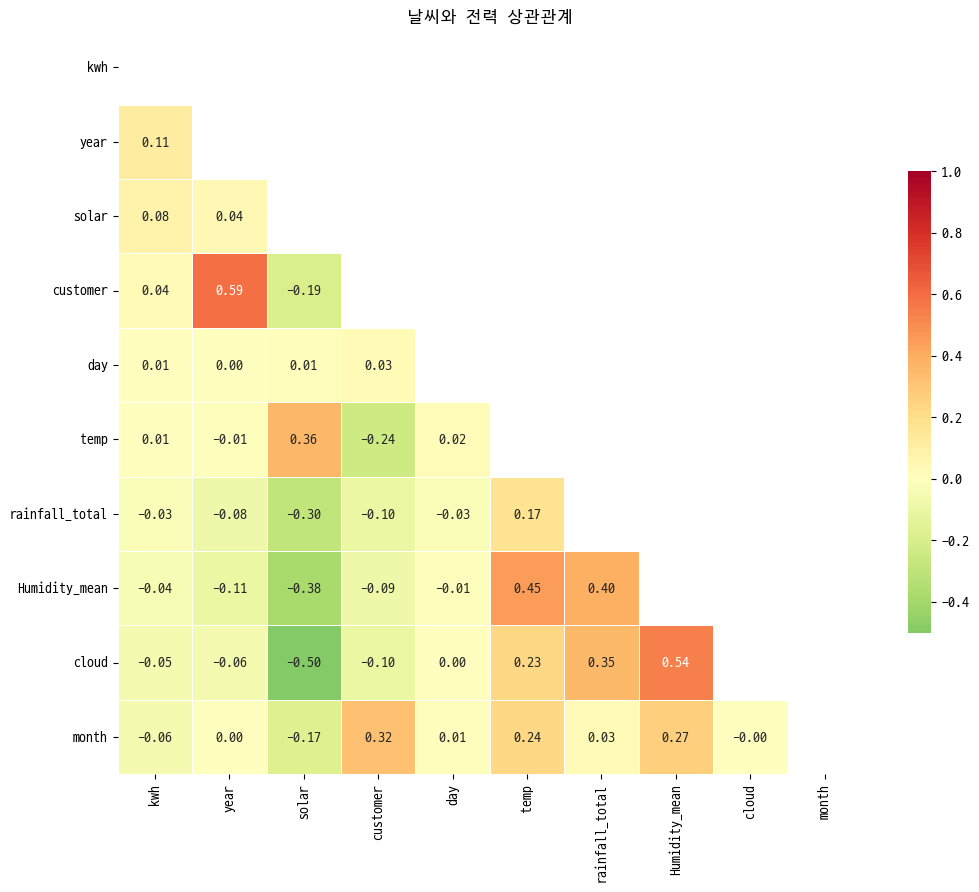

In [127]:
kw_matrix = day_df1.corr()
kw_matrix = kw_matrix.sort_values(by = 'kwh', axis = 0, ascending=False)
kw_matrix = kw_matrix[kw_matrix.index]
kw_matrix
# 상관관계의 시각적 표현
f, ax = plt.subplots(figsize=(12, 12))
corr = kw_matrix.select_dtypes(exclude=["object","bool"]).corr()

# 대각 행렬을 기준으로 한 쪽만 나타나게 설정해줍니다.
mask = np.zeros_like(kw_matrix, dtype='bool')
mask[np.triu_indices_from(mask)] = True

g = sns.heatmap(kw_matrix, cmap='RdYlGn_r', vmax= 1, mask=mask, 
center=0, annot=True, fmt='.2f', square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("날씨와 전력 상관관계")

## 결론 날씨와 전력은 상관관계가 거의 없다